# Transformers

## Sentence Transformers 
(https://www.sbert.net/)

Sentence BERT is a library that allows the creation of sentence embeddings based on transformer models, including nearly all models available on Huggingface.  A 'sentence' does not mean a literal sentence, it refers to any text.  

Once we have embeddings available, there is no limit to what we can do with it.  We can pass the embeddings to traditional or network based models to drive classification, regression, or perform clustering of text data using any clustering method such as k-means or hierarchical clustering.

We will start with sentence BERT, and look at some examples of the kinds of problems we can solve with it.  

**Get some text data**  
We import about 10,000 random articles that were collected using web scraping the net for articles that address cybersecurity.  Some item are long, some are short, and others are not really even articles as those might just be ads or other website notices.  
**Local saving and loading of models**
> Save with:
```
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-roberta-large-v1')

model.save(path)
```
> Load with:
```
from sentence_transformers import SentenceTransformer

model = SentenceTransformer(path)
```


In [1]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [2]:
# Usual library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import torch

In [5]:
pwd

'/home/instructor/shared'

In [7]:
# Import the data from a pickle file
df = pd.read_pickle('sample.pkl')

In [8]:
# How many rows and columns in our dataframe
df.shape

(10117, 7)

In [9]:
# We look at the dataframe below.  The column of interest to us is the column titled 'text'
df

,title,summary_x,URL,keywords,summary_y,text,published_date
0,Friday Squid Blogging: On Squid Brains,<p>Interesting <i>National Geographic</i> <a h...,https://www.schneier.com/blog/archives/2021/08...,"working,school,technologist,security,schneier,...",About Bruce SchneierI am a public-interest tec...,About Bruce Schneier\n\nI am a public-interest...,2021-08-20 21:18:14
1,More on Apple’s iPhone Backdoor,"<p>In this post, I&#8217;ll collect links on A...",https://www.schneier.com/blog/archives/2021/08...,"service,using,wiserposted,iphone,security,appl...","More on Apple’s iPhone BackdoorIn this post, I...",More on Apple’s iPhone Backdoor\n\nIn this pos...,2021-08-20 13:54:51
2,T-Mobile Data Breach,"<p>It&#8217;s a <a href=""https://www.wired.com...",https://www.schneier.com/blog/archives/2021/08...,"tmobiles,numbers,data,tmobile,security,schneie...",It’s a big one:As first reported by Motherboar...,It’s a big one:\n\nAs first reported by Mother...,2021-08-19 11:17:56
3,Apple’s NeuralHash Algorithm Has Been Reverse-...,"<p>Apple&#8217;s <a href=""https://www.apple.co...",https://www.schneier.com/blog/archives/2021/08...,"using,step,neuralhash,security,schneier,tests,...",Apple’s NeuralHash Algorithm Has Been Reverse-...,Apple’s NeuralHash Algorithm Has Been Reverse-...,2021-08-18 16:51:17
4,Upcoming Speaking Engagements,<p>This is a current list of where and when I ...,https://www.schneier.com/blog/archives/2021/08...,"comments,pageposted,speakthe,scheduled,engagem...",Upcoming Speaking EngagementsThis is a current...,Upcoming Speaking Engagements\n\nThis is a cur...,2021-08-14 17:01:46
...,...,...,...,...,...,...,...
10112,Nigeria’s Autochek acquires Cheki Kenya and Ug...,Nigerian automotive tech company Autochek toda...,http://feedproxy.google.com/~r/Techcrunch/~3/0...,"autochek,kenya,cheki,acquires,roam,ghana,ugand...",Nigerian automotive tech company Autochek toda...,Nigerian automotive tech company Autochek toda...,2021-09-06 07:56:18
10113,President of El Salvador says the country boug...,"<a href=""https://www.coindesk.com/policy/2021/...",http://www.techmeme.com/210907/p2#a210907p2,"common,el,work,law,tender,theres,comes,salvado...",— The Starters — Apple Inc. and Tesla Inc. hav...,— The Starters — Apple Inc. and Tesla Inc. hav...,2021-09-07 04:15:02
10114,"A look at the growing movement of ""self-hostin...","<a href=""https://www.vice.com/en/article/pkb4n...",http://www.techmeme.com/210906/p10#a210906p10,"friends,john,market,run,nft,week,truly,review,...","— Hello friends, and welcome back to Week in R...","— Hello friends, and welcome back to Week in R...",2021-09-06 17:50:01
10115,CoinGecko: Solana's SOL token has more than tr...,"<a href=""https://www.bloomberg.com/news/articl...",http://www.techmeme.com/210906/p7#a210906p7,"sol,startup,weeks,run,kind,solanas,smbs,resour...","— Factorial, a startup out of Barcelona that h...","— Factorial, a startup out of Barcelona that h...",2021-09-06 13:15:01


In [10]:
# We create a dataframe with just the story text, and call it corpus

corpus = df[['text']]

In [11]:
corpus

,text
0,About Bruce Schneier\n\nI am a public-interest...
1,More on Apple’s iPhone Backdoor\n\nIn this pos...
2,It’s a big one:\n\nAs first reported by Mother...
3,Apple’s NeuralHash Algorithm Has Been Reverse-...
4,Upcoming Speaking Engagements\n\nThis is a cur...
...,...
10112,Nigerian automotive tech company Autochek toda...
10113,— The Starters — Apple Inc. and Tesla Inc. hav...
10114,"— Hello friends, and welcome back to Week in R..."
10115,"— Factorial, a startup out of Barcelona that h..."


count    10117.000000
mean       559.145003
std        501.310623
min          0.000000
25%        293.000000
50%        450.000000
75%        724.000000
max       8807.000000
dtype: float64

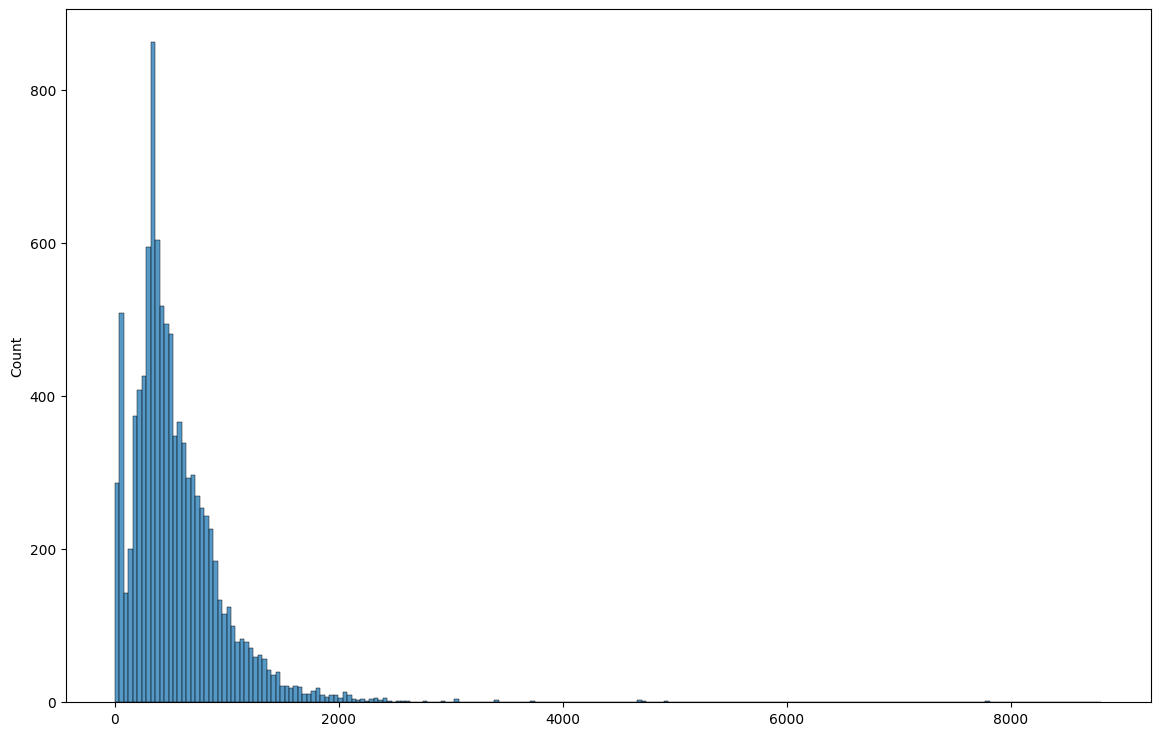

In [12]:
# Next, we examine how long the articles are.  Perhaps we want to 
# throw out the outliers, ie really short articles, which may 
# not really be articles, and also very long articles.
# 
# We do this below, looking at the mean and distribution of article lengths

article_lengths = [(len(x.split())) for x in (corpus.text)]
article_lengths = pd.Series(article_lengths)
plt.figure(figsize = (14,9))
sns.histplot(article_lengths)
pd.Series(article_lengths).describe()

In [13]:
# Let us see how many articles more than 2000 words
len(article_lengths[article_lengths>2000])

125

In [14]:
# Let us see how many articles less than 50 words
len(article_lengths[article_lengths<50])

349

In [15]:
# Let us just keep the regular sized articles, ie those greater than 50
# words, and also remove the excessively long articles.  We are still 
# left with a sizable number in our corpus.

print(10117-349-125)
len(article_lengths[(article_lengths[article_lengths>49]) & (article_lengths[article_lengths<2000])])

9643


9643

In [16]:
corpus = corpus[(article_lengths[article_lengths>49]) & (article_lengths[article_lengths<2000])]

count    9643.000000
mean      542.166753
std       346.111949
min        50.000000
25%       308.000000
50%       458.000000
75%       722.000000
max      1998.000000
dtype: float64

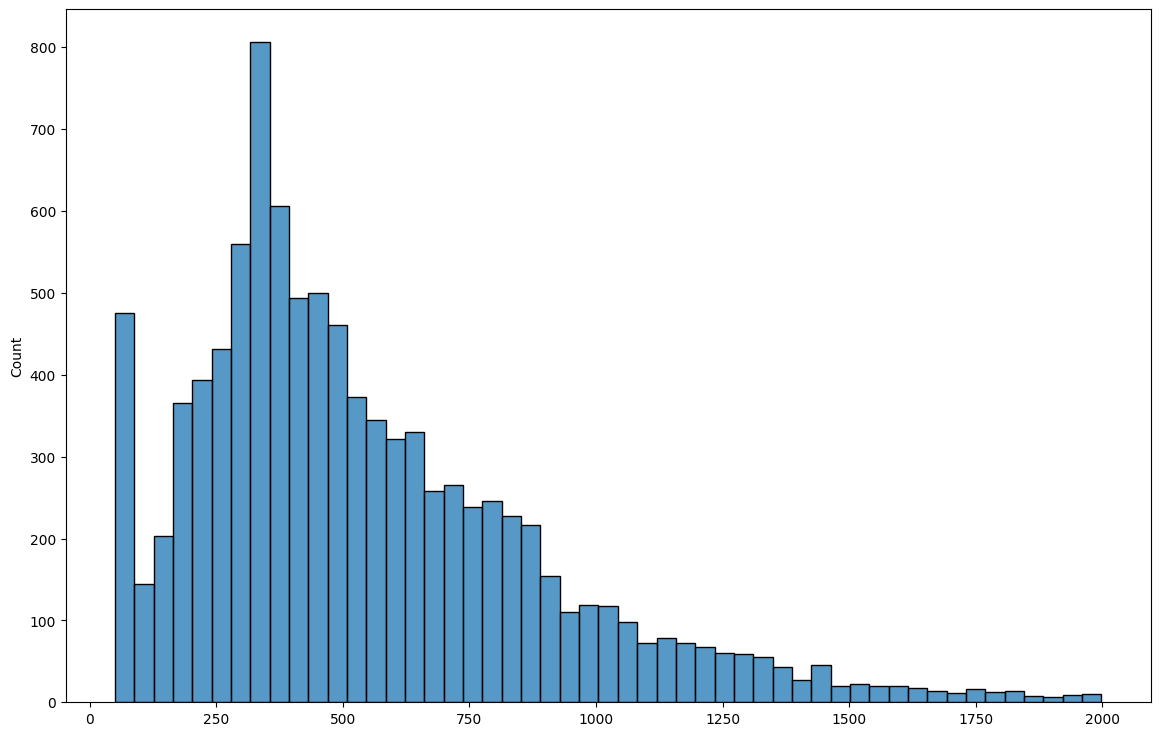

In [17]:
# Next we look at the distribution again

article_lengths = [(len(x.split())) for x in (corpus.text)]
article_lengths = pd.Series(article_lengths)
plt.figure(figsize = (14,9))
sns.histplot(article_lengths)
pd.Series(article_lengths).describe()

Our code becomes really slow if we use all 9600 articles, so we randomly pick just 100 articles from the corpus.  This is just so we can finish in time with the demos.  When you have more time, you can run the code for all the articles too.

In [18]:
# We take only a sample of the entire corpus
# If we want to consider the entire set, we do not need to run this cell

corpus = corpus.sample(100)

In [19]:
# Let us print out a random article

print(corpus.text.iloc[35])

Researchers Call for 'CVE' Approach for Cloud Vulnerabilities

New research suggests isolation among cloud customer accounts may not be a given -- and the researchers behind the findings issue a call to action for cloud security.

BLACK HAT USA 2021 - Las Vegas - A pair of researchers who have been rooting out security flaws and weaknesses in cloud services over the past year revealed here this week new issues that they say break the isolation among different customers' Amazon Web Services (AWS) accounts in the cloud.

Such cross-account cloud service vulnerabilities likely are more widespread than AWS, too, researchers Ami Luttwak and Shir Tamari of cloud security startup Wiz.io said of their findings.

The cross-account flaws suggest a chilling reality for cloud customers: that their cloud instances aren't necessarily isolated from those of the provider's other customers, according to the research. "We showed that it's possible to manipulate services in AWS to access to other service

### Embeddings/Feature Extraction

First, we get embeddings for our corpus using a specific model.  We use the 'all-MiniLM-L6-v2' for symmetric queries, and any of the MSMARCO models for asymmetric queries.  The difference between symmetric an asymmetric queries is that the query and the sentences are roughly the same length in symmetric queries.  In asymmetric queries, the query is much smaller than the sentences.

This is based upon the documentation on sentence-bert's website.

In [20]:
# Toy example with just three sentences to see what embeddings look like

from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-MiniLM-L6-v2') #for symmetric queries
model = SentenceTransformer('msmarco-distilroberta-base-v2') #for asymmetric queries
#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.94026753e-01 -1.22946471e-01 -1.03668034e-01 -5.60734451e-01
  1.10684834e-01  6.79869235e-01 -6.36456683e-02 -7.55183518e-01
  7.56757021e-01  2.64225602e-01 -1.42992526e-01  3.98469806e-01
  1.76254317e-01 -1.42204297e+00 -2.50023752e-01  6.46364130e-03
  4.95951176e-01  4.63492960e-01 -1.50223663e-02  8.64237010e-01
  1.83196366e-01 -8.47510576e-01 -7.40250051e-01 -1.01876450e+00
 -1.04469287e+00  5.33529937e-01  7.04184294e-01  3.23025227e-01
 -1.34202325e+00 -1.40403345e-01 -1.69760987e-01  9.34997261e-01
 -3.45070988e-01  4.92123514e-02  1.28698675e-02 -1.90801159e-01
  5.31530082e-01 -3.53034884e-01 -9.99689162e-01  1.29575148e-01
  8.10616910e-01  5.22234738e-01 -7.57189989e-01 -2.42323816e-01
  4.81891304e-01 -2.24909976e-01  5.87175131e-01 -9.55266297e-01
 -2.80446976e-01 -5.75490929e-02  1.38305891e+00 -6.43579364e-02
 -2.80887365e-01 -2.96109200e-01  6.02367103e-01 -6.88801706e-01
 -3.63944

In [21]:
embedding.shape

(768,)

In [22]:
%%time
# Use our data

from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-MiniLM-L6-v2') #for symmetric queries
model = SentenceTransformer('msmarco-distilroberta-base-v2') #for asymmetric queries

#Our sentences we like to encode
sentences = list(corpus.text)

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)



CPU times: user 41.9 s, sys: 7.98 s, total: 49.9 s
Wall time: 50.2 s


In [23]:
# At this point, the variable embeddings contains all our embeddings, one row for each document
# So we expect there to be 100 rows, and as many columns as the model we chose vectorizes text
# into.

embeddings.shape

(100, 768)

In [24]:
# model.save('msmarco-distilroberta-base-v2')

### Cosine similarity between sentences 
Using brute force method, and finding the most similar.  Very compute intensive, will not run if number of sentences is very large.

In [25]:
# This can crash the kernel, don't run unless you want to

run = True
if run:
    from sentence_transformers import SentenceTransformer, util
    #Compute cosine-similarities for each sentence with each other sentence
    cosine_scores = util.cos_sim(embeddings, embeddings)

    #Find the pairs with the highest cosine similarity scores
    pairs = []
    for i in range(len(cosine_scores)-1):
        for j in range(i+1, len(cosine_scores)):
            pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

    #Sort scores in decreasing order
    pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)



In [26]:
pairs[:10]

[{'index': [60, 79], 'score': tensor(0.9982)},
 {'index': [78, 79], 'score': tensor(0.9980)},
 {'index': [60, 78], 'score': tensor(0.9976)},
 {'index': [20, 77], 'score': tensor(0.8619)},
 {'index': [38, 57], 'score': tensor(0.8431)},
 {'index': [69, 72], 'score': tensor(0.8159)},
 {'index': [30, 57], 'score': tensor(0.8078)},
 {'index': [30, 54], 'score': tensor(0.7952)},
 {'index': [30, 38], 'score': tensor(0.7829)},
 {'index': [34, 90], 'score': tensor(0.7766)}]

In [ ]:
print(corpus.iloc[60].text)

In [ ]:
print(corpus.iloc[79].text)

In [29]:
print(corpus.iloc[81].values[0])

Experts warn of a new Hydra banking trojan campaign targeting European e-banking platform users, including the customers of Commerzbank.

Experts warn of a malware campaign targeting European e-banking platform users with the Hydra banking trojan. According to malware researchers from the MalwareHunterTeam and Cyble, the new campaign mainly impacted the customers of Commerzbank, Germany’s second-largest bank. Hydra is an Android Banking Bot that has been active at least since early 2019.

"Commerzbank.apk": 5e9f31ecca447ff0fa9ea0d1245c938dcd4191b6944f161e35a0d27aa41b102f

From: http://kunden.commerzbank.de-id187dbbv671vvdazuv1zev789bvdv681gfbvazvuz8178g4[.]xyz/dl/coba/index.php – resolving to 91.214.124[.]225, there are more domains like this resolving there… pic.twitter.com/StSv2Dijlc — MalwareHunterTeam (@malwrhunterteam) September 27, 2021

Threat actors set up a page posing as the official CommerzBank page and registered multiple domains on the same IP (91.214.124[.]225). Crooks us

### Semantic paraphrasing
Finds similar articles, except more efficient

In [30]:
%%time
from sentence_transformers import SentenceTransformer, util

# model = SentenceTransformer('all-MiniLM-L6-v2')

# Single list of sentences - Possible tens of thousands of sentences
sentences = list(corpus.text)

paraphrases = util.paraphrase_mining(model, sentences)

# below code good only for small articles
# for paraphrase in paraphrases[0:25]:
#     score, i, j = paraphrase
#     print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], score))
    
paraphrases[:10]

CPU times: user 41.8 s, sys: 7.66 s, total: 49.4 s
Wall time: 49.8 s


[[0.9982025623321533, 60, 79],
 [0.9979702830314636, 78, 79],
 [0.9976249933242798, 60, 78],
 [0.8618721961975098, 20, 77],
 [0.8431403040885925, 38, 57],
 [0.8158525824546814, 69, 72],
 [0.807816743850708, 30, 57],
 [0.795203685760498, 30, 54],
 [0.7828570604324341, 30, 38],
 [0.7765707969665527, 34, 90]]

In [31]:
print(sentences[55])

The Linux Foundation released its 2021 Open Source Jobs Report this month, which aims to inform both sides of the IT hiring process about current trends. The report accurately foreshadows many of its conclusions in the first paragraph, saying "the talent gap that existed before the pandemic has worsened due to an acceleration of cloud-native adoption as remote work has gone mainstream." In other words: job-shopping Kubernetes and AWS experts are in luck.

The Foundation surveyed roughly 200 hiring managers and 750 open source professionals to find out which skills—and HR-friendly resume bullet points—are in the greatest demand. According to the report, college-degree requirements are trending down, but IT-certification requirements and/or preferences are trending up—and for the first time, "cloud-native" skills (such as Kubernetes management) are in higher demand than traditional Linux skills.

Advertisement

The hiring priority shift from traditional Linux to "cloud-native" skill sets

In [32]:
print(sentences[72])

[Follow live news coverage of the Elizabeth Holmes trial.]

SAN JOSE, Calif. — At the height of her acclaim in 2015, Elizabeth Holmes, the entrepreneur who founded the blood testing start-up Theranos, was named Glamour’s “Woman of the Year.” Time put her on its list of 100 luminaries. And she graced the covers of Fortune, Forbes, Inc. and T Magazine.

Theranos collapsed in scandal three years later, failing in its mission to revolutionize the health care industry. But it did change the world in another way: It helped sour the media on Silicon Valley.

That point was brought home on Thursday when Roger Parloff, a journalist who penned the Fortune cover story on Ms. Holmes and Theranos in 2014, testified in a federal courtroom in San Jose, Calif., where Ms. Holmes is on trial for 12 counts of fraud. Mr. Parloff said Ms. Holmes had made misrepresentations to him, including the volume and types of tests that Theranos could do, as well as its work with the military and pharmaceutical compan

### Semantic Search

In [33]:
# Query sentence - one at a time:
query = ['vaccine for children']



# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))

query_embedding = model.encode(query, convert_to_tensor=True)

# We use cosine-similarity and torch.topk to find the highest 5 scores
cos_scores = util.cos_sim(query_embedding, embeddings)[0]
top_results = torch.topk(cos_scores, k=top_k)

score, idx = top_results[0], top_results[1]

for index, i in enumerate(idx):
    print('\n------Similarly score is', score[index])
    print(corpus.text.iloc[int(i)])
    print('\n---------------------\n---------------------\n---------------------')
    
    


------Similarly score is tensor(0.3293)
Though booster doses of current vaccines can foil the ultra-transmissible omicron coronavirus variant, a towering wave of omicron cases may peak in the US as soon as January, officials warn.

Scientists are still racing to fully understand the variant, which first gained international attention in late November. But a few things are becoming increasingly clear: the variant spreads stunningly fast, and it can largely circumvent protection from two vaccine doses. However, people who have received a third vaccine dose are well-protected against severe disease.

In a White House press briefing Wednesday, top infectious disease expert Anthony Fauci reviewed the early laboratory and real-world data on vaccine effectiveness. Numerous laboratory studies have all shown that levels of neutralizing antibodies from two doses of a vaccine are significantly lower against omicron—potentially so low that they do not protect against the variant. But studies look

In [34]:
query_embedding.shape

torch.Size([1, 768])

In [35]:
embeddings.shape

(100, 768)

### Clustering
#### KMeans

In [36]:
from sklearn.cluster import KMeans

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters, n_init='auto')
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(list(corpus.text)[sentence_id])

# for i, cluster in enumerate(clustered_sentences):
#     print("Cluster ", i+1)
#     print(cluster)
#     print("")

In [37]:
clustering_model.labels_.shape

(100,)

In [38]:
cluster_assignment

array([1, 4, 1, 1, 3, 1, 4, 3, 3, 4, 1, 1, 3, 1, 4, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 3, 1, 1, 4, 1, 4, 1, 1, 4, 4, 4, 1, 1, 4, 3, 1, 1, 1, 2,
       1, 0, 1, 1, 4, 1, 2, 1, 4, 4, 4, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 4, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 4, 1, 3, 4, 3, 4, 1,
       1, 4, 4, 2, 1, 3, 3, 1, 3, 1, 3, 4], dtype=int32)

In [39]:
pd.Series(cluster_assignment).value_counts()

1    55
4    24
3    14
2     5
0     2
Name: count, dtype: int64

## Huggingface Pipeline function
The Huggingface Pipeline function wraps everything together for a number of common NLP tasks.  

The format for the commands is as below:

```python
from transformers import pipeline

# Using default model and tokenizer for the task
pipeline("<task-name>")

# Using a user-specified model
pipeline("<task-name>", model="<model_name>")

# Using custom model/tokenizer as str
pipeline('<task-name>', model='<model name>', tokenizer='<tokenizer_name>')
```



By default, pipeline selects a particular pretrained model that has been fine-tuned for the specified task. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

Pipelines are made of:

 - A tokenizer in charge of mapping raw textual input to token.
 - A model to make predictions from the inputs.
 - Some (optional) post processing for enhancing model’s output.

Some of the currently available pipelines are:

- feature-extraction (get the vector representation of a text)  
- fill-mask  
- ner (named entity recognition)  
- question-answering  
- sentiment-analysis  
- summarization  
- text-generation  
- translation  
- zero-shot-classification  

Each pipeline has a default model, which can be obtained from https://github.com/huggingface/transformers/blob/main/src/transformers/pipelines/__init__.py

Pipeline | Default Model
-----|-----
"feature-extraction" | "distilbert-base-cased"
"fill-mask" | "distilroberta-base"
"ner" | "t5-base"
"question-answering" | "distilbert-base-cased-distilled-squad"
"summarization" | "sshleifer/distilbart-cnn-12-6"
"translation" | "t5-base"
"text-generation" | "gpt2"
"text2text-generation" | "t5-base"
"zero-shot-classification" | "facebook/bart-large-mnli"
"conversational" | "microsoft/DialoGPT-medium"

**First, some library imports**  

In [40]:
# First, some library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import torch

from transformers import AutoTokenizer, AutoModel, pipeline

2023-12-01 19:25:45.847987: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 19:25:46.296536: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 19:25:49.428407: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [41]:
mytext = """
Panther Labs, an early stage startup that specializes in detection and response analytics, has raised a whopping $120 million in a new round of funding led by hedge fund Coatue Management.

Panther Labs said the Series B investment was raised at a $1.4 billion valuation, putting the company among a growing list of ‘unicorn’ cybersecurity startups.

In addition to Coatue Management, Panther Labs scored investments from ICONIQ Growth and Snowflake Ventures along with money from existing investors Lightspeed Venture Partners, S28 Capital, and Innovation Endeavors.

The company previously raised $15 million in a September 2020 Series A round.

The San Francisco firm, which was founded by Airbnb and AWS alumni, styles itself as a “cloud-scale security analytics platform” that helps organizations prevent breaches by providing actionable insights from large volumes of data.

The Panther product can be used by security teams to perform continuous security monitoring, gain security visibility across cloud and on-premise infrastructure, and build data lakes for incident response investigations.

In the last year, Panther claims its customer roster grew by 300 percent, including deals with big companies like Dropbox, Zapier and Snyk.

Panther Labs said the new funding will be used to speed up product development, expand go-to-marketing initiatives and scale support for its customers.

Related: Panther Labs Launches Open-Source Cloud-Native SIEM

Related: CyCognito Snags $100 Million for Attack Surface Management
"""

In [42]:
print(len(mytext.split()))
print(mytext)

224

Panther Labs, an early stage startup that specializes in detection and response analytics, has raised a whopping $120 million in a new round of funding led by hedge fund Coatue Management.

Panther Labs said the Series B investment was raised at a $1.4 billion valuation, putting the company among a growing list of ‘unicorn’ cybersecurity startups.

In addition to Coatue Management, Panther Labs scored investments from ICONIQ Growth and Snowflake Ventures along with money from existing investors Lightspeed Venture Partners, S28 Capital, and Innovation Endeavors.

The company previously raised $15 million in a September 2020 Series A round.

The San Francisco firm, which was founded by Airbnb and AWS alumni, styles itself as a “cloud-scale security analytics platform” that helps organizations prevent breaches by providing actionable insights from large volumes of data.

The Panther product can be used by security teams to perform continuous security monitoring, gain security visibil

In [1]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

### Embeddings/Feature Extraction

Feature extraction allows us to obtain embeddings for a sentence.  This is similar (in fact identical) to embeddings obtained from sentence-transformers.

In [44]:
pwd

'/home/instructor/shared'

In [45]:
feature_extraction = pipeline('feature-extraction')
features = feature_extraction("i am awesome")
features = np.squeeze(features)
print(features.shape)

No model was supplied, defaulted to distilbert-base-cased and revision 935ac13 (https://huggingface.co/distilbert-base-cased).
Using a pipeline without specifying a model name and revision in production is not recommended.


(5, 768)


In [46]:
# If you summarize by column, you get the same results as `model.encode` with sentence-bert
features = np.mean(features, axis=0)

In [47]:
features.shape

(768,)

In [48]:
# Let us try feature extraction on mytext
features = feature_extraction(mytext)
features = np.squeeze(features)
print(features.shape)

(322, 768)


### Fill Mask

In [49]:
fill_mask = pipeline('fill-mask') 
fill_mask('New York is a <mask>')

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.10091249644756317,
  'token': 8018,
  'token_str': ' joke',
  'sequence': 'New York is a joke'},
 {'score': 0.04816770926117897,
  'token': 4593,
  'token_str': ' democracy',
  'sequence': 'New York is a democracy'},
 {'score': 0.046186525374650955,
  'token': 7319,
  'token_str': ' mess',
  'sequence': 'New York is a mess'},
 {'score': 0.04198995232582092,
  'token': 20812,
  'token_str': ' circus',
  'sequence': 'New York is a circus'},
 {'score': 0.024249713867902756,
  'token': 43689,
  'token_str': ' wasteland',
  'sequence': 'New York is a wasteland'}]

In [50]:
fill_mask = pipeline('fill-mask', model = 'distilroberta-base')
fill_mask('New <mask> is a great city')

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.42242366075515747,
  'token': 469,
  'token_str': ' York',
  'sequence': 'New York is a great city'},
 {'score': 0.2367219477891922,
  'token': 4942,
  'token_str': ' Orleans',
  'sequence': 'New Orleans is a great city'},
 {'score': 0.08853636682033539,
  'token': 3123,
  'token_str': ' Jersey',
  'sequence': 'New Jersey is a great city'},
 {'score': 0.06783503293991089,
  'token': 3534,
  'token_str': ' Delhi',
  'sequence': 'New Delhi is a great city'},
 {'score': 0.032185353338718414,
  'token': 12050,
  'token_str': ' Haven',
  'sequence': 'New Haven is a great city'}]

In [51]:
fill_mask('Joe Biden is a good <mask>')

[{'score': 0.09071359038352966,
  'token': 2173,
  'token_str': ' guy',
  'sequence': 'Joe Biden is a good guy'},
 {'score': 0.07118405401706696,
  'token': 1441,
  'token_str': ' friend',
  'sequence': 'Joe Biden is a good friend'},
 {'score': 0.0398402214050293,
  'token': 30443,
  'token_str': ' listener',
  'sequence': 'Joe Biden is a good listener'},
 {'score': 0.033013053238391876,
  'token': 28587,
  'token_str': ' liar',
  'sequence': 'Joe Biden is a good liar'},
 {'score': 0.030751364305615425,
  'token': 313,
  'token_str': ' man',
  'sequence': 'Joe Biden is a good man'}]

In [52]:
fill_mask('Joe Biden is in a good <mask>')

[{'score': 0.8292388319969177,
  'token': 6711,
  'token_str': ' mood',
  'sequence': 'Joe Biden is in a good mood'},
 {'score': 0.040497805923223495,
  'token': 3989,
  'token_str': ' shape',
  'sequence': 'Joe Biden is in a good shape'},
 {'score': 0.02688235603272915,
  'token': 317,
  'token_str': ' place',
  'sequence': 'Joe Biden is in a good place'},
 {'score': 0.024332040920853615,
  'token': 1514,
  'token_str': ' spot',
  'sequence': 'Joe Biden is in a good spot'},
 {'score': 0.013950918801128864,
  'token': 737,
  'token_str': ' position',
  'sequence': 'Joe Biden is in a good position'}]

### Sentiment Analysis (+ve/-ve)

In [1]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [53]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

classifier("It was sort of ok")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9996662139892578}]

In [54]:
classifier(mytext)

[{'label': 'POSITIVE', 'score': 0.8596643209457397}]

### Named Entity Recognition  

Identify tokens as belonging to one of 9 classes:

```
O, Outside of a named entity
B-MIS, Beginning of a miscellaneous entity right after another miscellaneous entity
I-MIS, Miscellaneous entity
B-PER, Beginning of a person’s name right after another person’s name
I-PER, Person’s name
B-ORG, Beginning of an organisation right after another organisation
I-ORG, Organisation
B-LOC, Beginning of a location right after another location
I-LOC, Location
```

In [1]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [55]:
ner = pipeline("ner") 

ner("Seattle is a city in Washington where Microsoft is headquartered")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity': 'I-LOC',
  'score': 0.99756324,
  'index': 1,
  'word': 'Seattle',
  'start': 0,
  'end': 7},
 {'entity': 'I-LOC',
  'score': 0.9981115,
  'index': 6,
  'word': 'Washington',
  'start': 21,
  'end': 31},
 {'entity': 'I-ORG',
  'score': 0.9993381,
  'index': 8,
  'word': 'Microsoft',
  'start': 38,
  'end': 47}]

In [56]:
ner(mytext)

[{'entity': 'I-ORG',
  'score': 0.99932563,
  'index': 1,
  'word': 'Panther',
  'start': 1,
  'end': 8},
 {'entity': 'I-ORG',
  'score': 0.9993229,
  'index': 2,
  'word': 'Labs',
  'start': 9,
  'end': 13},
 {'entity': 'I-ORG',
  'score': 0.9992663,
  'index': 37,
  'word': 'Co',
  'start': 171,
  'end': 173},
 {'entity': 'I-ORG',
  'score': 0.9986853,
  'index': 38,
  'word': '##at',
  'start': 173,
  'end': 175},
 {'entity': 'I-ORG',
  'score': 0.999196,
  'index': 39,
  'word': '##ue',
  'start': 175,
  'end': 177},
 {'entity': 'I-ORG',
  'score': 0.99944323,
  'index': 40,
  'word': 'Management',
  'start': 178,
  'end': 188},
 {'entity': 'I-ORG',
  'score': 0.9994549,
  'index': 42,
  'word': 'Panther',
  'start': 191,
  'end': 198},
 {'entity': 'I-ORG',
  'score': 0.9986261,
  'index': 43,
  'word': 'Labs',
  'start': 199,
  'end': 203},
 {'entity': 'I-ORG',
  'score': 0.99832755,
  'index': 85,
  'word': 'Co',
  'start': 367,
  'end': 369},
 {'entity': 'I-ORG',
  'score': 0.99

### Question Answering

In [1]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [57]:
from transformers import pipeline

question_answerer = pipeline("question-answering") 

question_answerer(
    question="Where do I work?",
    context="My name is Mukul and I work at NYU Tandon in Brooklyn",
)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.7861830592155457, 'start': 31, 'end': 41, 'answer': 'NYU Tandon'}

In [58]:
print(mytext)


Panther Labs, an early stage startup that specializes in detection and response analytics, has raised a whopping $120 million in a new round of funding led by hedge fund Coatue Management.

Panther Labs said the Series B investment was raised at a $1.4 billion valuation, putting the company among a growing list of ‘unicorn’ cybersecurity startups.

In addition to Coatue Management, Panther Labs scored investments from ICONIQ Growth and Snowflake Ventures along with money from existing investors Lightspeed Venture Partners, S28 Capital, and Innovation Endeavors.

The company previously raised $15 million in a September 2020 Series A round.

The San Francisco firm, which was founded by Airbnb and AWS alumni, styles itself as a “cloud-scale security analytics platform” that helps organizations prevent breaches by providing actionable insights from large volumes of data.

The Panther product can be used by security teams to perform continuous security monitoring, gain security visibility 

In [59]:
question_answerer(
    question = "How much did Panther Labs raise",
    context = mytext,
)

{'score': 0.02731623686850071,
 'start': 249,
 'end': 261,
 'answer': '$1.4 billion'}

In [60]:
question_answerer(
    question = "How much did Panther Labs raise previously",
    context = mytext,
)

{'score': 0.6693973541259766,
 'start': 600,
 'end': 611,
 'answer': '$15 million'}

In [61]:
question_answerer(
    question = "Who founded Panter Labs",
    context = mytext,
)

{'score': 2.9083561457809992e-05,
 'start': 694,
 'end': 715,
 'answer': 'Airbnb and AWS alumni'}

### Summarization

In [1]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [3]:
from transformers import pipeline

summarizer = pipeline("summarization")

summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China anbd India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' America suffers an increasingly serious decline in the number of engineering graduates and a lack of well-educated engineers . Rapidly developing economies such as China anbd India, as well as other industrial countries in Europe and Asia, continue to encourage and advance the teaching of engineering . Both China and India graduate six and eight times as many traditional engineers as does the United States .'}]

In [1]:
mytext = """
Panther Labs, an early stage startup that specializes in detection and response analytics, has raised a whopping $120 million in a new round of funding led by hedge fund Coatue Management.

Panther Labs said the Series B investment was raised at a $1.4 billion valuation, putting the company among a growing list of ‘unicorn’ cybersecurity startups.

In addition to Coatue Management, Panther Labs scored investments from ICONIQ Growth and Snowflake Ventures along with money from existing investors Lightspeed Venture Partners, S28 Capital, and Innovation Endeavors.

The company previously raised $15 million in a September 2020 Series A round.

The San Francisco firm, which was founded by Airbnb and AWS alumni, styles itself as a “cloud-scale security analytics platform” that helps organizations prevent breaches by providing actionable insights from large volumes of data.

The Panther product can be used by security teams to perform continuous security monitoring, gain security visibility across cloud and on-premise infrastructure, and build data lakes for incident response investigations.

In the last year, Panther claims its customer roster grew by 300 percent, including deals with big companies like Dropbox, Zapier and Snyk.

Panther Labs said the new funding will be used to speed up product development, expand go-to-marketing initiatives and scale support for its customers.

Related: Panther Labs Launches Open-Source Cloud-Native SIEM

Related: CyCognito Snags $100 Million for Attack Surface Management
"""

In [6]:
summarizer(mytext)

[{'summary_text': ' Panther Labs is a ‘cloud-scale security analytics platform’ that helps organizations prevent breaches by providing actionable insights from large volumes of data . The San Francisco startup claims its customer roster grew by 300 percent in the last year, including deals with Dropbox, Zapier and Snyk . The new funding will be used to speed up product development and expand go-to-marketing initiatives .'}]

### Translation

In [7]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [8]:
translator = pipeline("translation_en_to_fr")
translator("I do not speak French")

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
/opt/conda/envs/mggy8413/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[{'translation_text': 'Je ne parle pas français'}]

### Text Generation

In [9]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [11]:
generator = pipeline("text-generation")

generator("In this course, we will teach you how to", max_length = 100, num_return_sequences=4)

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to apply mathematical operations to the application of the principles of statistical theory. We cover:\n\nthe nature of measurement\n\nproblems of measurement problem solving'},
 {'generated_text': "In this course, we will teach you how to make a simple version of a small program that makes an important difference on the front line of a mission mission.\n\nThis program could serve as a start toward solving the main question we want to answer: Why are you doing this thing that I'm doing all other people do? Why would you put money into this mission, and why do you choose a different mission instead? And this is the way we design the systems for achieving those goals.\n"},
 {'generated_text': 'In this course, we will teach you how to apply your knowledge of C++ code to various common projects and projects as a Python developer.\n\n\nThis course will teach you about C++. This course will take you through writing your first Python 

### Zero Shot Classification

In [2]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [3]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")

classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

2023-12-01 19:33:00.383943: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 19:33:00.905887: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 19:33:03.941983: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445998430252075, 0.11197364330291748, 0.04342653974890709]}

In [4]:
classifier(mytext, candidate_labels=["education", "politics", "business"])

{'sequence': '\nPanther Labs, an early stage startup that specializes in detection and response analytics, has raised a whopping $120 million in a new round of funding led by hedge fund Coatue Management.\n\nPanther Labs said the Series B investment was raised at a $1.4 billion valuation, putting the company among a growing list of ‘unicorn’ cybersecurity startups.\n\nIn addition to Coatue Management, Panther Labs scored investments from ICONIQ Growth and Snowflake Ventures along with money from existing investors Lightspeed Venture Partners, S28 Capital, and Innovation Endeavors.\n\nThe company previously raised $15 million in a September 2020 Series A round.\n\nThe San Francisco firm, which was founded by Airbnb and AWS alumni, styles itself as a “cloud-scale security analytics platform” that helps organizations prevent breaches by providing actionable insights from large volumes of data.\n\nThe Panther product can be used by security teams to perform continuous security monitoring, 

### Text to text generation
Text2TextGeneration can be used for a variety of NLP tasks like question answering, sentiment classification, question generation, translation, paraphrasing, summarization, etc.

Refer details at:  
https://theaidigest.in/text2textgeneration-pipeline-by-huggingface-transformers/  

There are some interesting things this pipeline can do, for example:  


#### Question Answering

In [5]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [6]:
from transformers import pipeline
text2text_generator = pipeline("text2text-generation", model = 't5-base') 

text2text_generator("question: What is 42 ? context: 42 is the answer to life, the universe and everything")

/opt/conda/envs/mggy8413/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
/opt/conda/envs/mggy8413/lib/python3.10/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens`

[{'generated_text': 'the answer to life, the universe and everything'}]

#### Summarization

In [8]:
mytext = """
Panther Labs, an early stage startup that specializes in detection and response analytics, has raised a whopping $120 million in a new round of funding led by hedge fund Coatue Management.

Panther Labs said the Series B investment was raised at a $1.4 billion valuation, putting the company among a growing list of ‘unicorn’ cybersecurity startups.

In addition to Coatue Management, Panther Labs scored investments from ICONIQ Growth and Snowflake Ventures along with money from existing investors Lightspeed Venture Partners, S28 Capital, and Innovation Endeavors.

The company previously raised $15 million in a September 2020 Series A round.

The San Francisco firm, which was founded by Airbnb and AWS alumni, styles itself as a “cloud-scale security analytics platform” that helps organizations prevent breaches by providing actionable insights from large volumes of data.

The Panther product can be used by security teams to perform continuous security monitoring, gain security visibility across cloud and on-premise infrastructure, and build data lakes for incident response investigations.

In the last year, Panther claims its customer roster grew by 300 percent, including deals with big companies like Dropbox, Zapier and Snyk.

Panther Labs said the new funding will be used to speed up product development, expand go-to-marketing initiatives and scale support for its customers.

Related: Panther Labs Launches Open-Source Cloud-Native SIEM

Related: CyCognito Snags $100 Million for Attack Surface Management
"""

In [7]:
text2text_generator("summarize: Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, \
                     in particular how to program computers to process and analyze large amounts of natural language data.")

[{'generated_text': 'natural language processing (NLP) is a subfield of linguistics, computer science'}]

In [9]:
text2text_generator("summarize: " + mytext)

[{'generated_text': 'the company was founded by Airbnb and AWS alumni . it is a cloud-scale'}]

#### Sentiment Analysis

In [10]:
text2text_generator("sst2 sentence: The vastness of space offers many opportunities for humanity.")

[{'generated_text': 'positive'}]